# WHETGEO-2D
## Manzini and Ferraris 2004

    -Authors: Niccolò Tubini, Riccardo Rigon
    - Licence: this work is licensed under a Creative Commons Attribution-NonCommercial 4.0 International License
----
**This notebook is freely inspired to the Notebooks presented in Clark et al. (2021)**

## Table of Contents

* [Expectations](#Expectations)
* [Meta data](#Meta-data)
* [Reference](#Reference)
* [Computational grid](#Computational-grid)
* [Visualize the output](#Visualize-the-output)
    * [Saturation degree](#Saturation-degree)




## Expectations
The simulation should reproduce the results of the test problem 4 presented in Manzini and Ferraris (2004).

As stated by the Authors this numerical test case is interesting since it there is a large variation of the capillary and gravity effects in time and space. Specifically, the critical aspect regards the fact that the wetting front reaches the bottom layer in different times enhancing the horizontal variability of hydraulic properties. Moreover, two saturated boundary conditions at the top and at the bottom are imposed.

<figure>
    <center>
    <img src="Figures/Manzini_Ferraris_2004.PNG" width="400" height="400/1.618">
    <figcaption>Figure (3) in Kirkland et al. (1992). </figcaption>
    </center>
</figure>

## Meta data

| Data  | Value  |
|:---|:---|
| Model name| WHETGEO-2D |
| Model version  |  v0.9-beta |
| Model reference | Tubini and Rigon (2022) |
| Grid input file | `data/mesh/Manzini_Ferraris_2004.mesh` |
| Boundary condition file | `data/Timeseries/Manzini_Ferraris_2004/Manzini_Ferraris_2004.csv` |
| .sim file | `simulation/WHETGEO2D_Manzini_Ferraris_2004.sim` |
| Model runs by | N. Tubini|
| Notebook code by | N. Tubini | 

## Reference

- Clark, M.P., Zolfaghari, R., Green, K.R., Trim, S.J., Knoben, W.J., Bennett, A.R., Nijssen, B., Ireson, A.M., & Spiteri, R.J. (2021). The numerical implementation of land models: Problem formulation and laugh tests. Journal of Hydrometeorology.

- Manzini, G., & Ferraris, S. (2004). Mass-conservative finite volume methods on 2-D unstructured grids for the Richards’ equation. Advances in Water Resources, 27(12), 1199-1215.

- Tubini, N.: Theoretical and numerical tools for studying the Critical Zone from plot to catchments, PhD thesis, University of Trento, 2021.

In [2]:

%load_ext autoreload
%autoreload 2

import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.dates as mdates
import matplotlib.colors as cl # to define new color map
import matplotlib.patches as mpatches
from matplotlib import rc
%matplotlib inline
import matplotlib.style as style 
import matplotlib.tri as tri
import math
import xarray as xr

import whetgeo2d_mesh 
from whetgeo2d_output import*

import warnings
warnings.filterwarnings('ignore')

style.available
style.use('seaborn-whitegrid')

import whetgeo2D as wg

nice_fonts = {
        "legend.frameon": True,
        "legend.fancybox": True,
        "legend.facecolor": "white",
        "axes.edgecolor": "0.8",
        "axes.linewidth": 0.6,
        "grid.linewidth":0.4,
        # Use LaTeX to write all text
        "text.usetex": True,
        "font.family": "serif",
        # Use 10pt font in plots, to match 10pt font in document
        "axes.labelsize": 10,
        "font.size": 10,
        # Make the legend/label fonts a little smaller
        "legend.fontsize": 8,
        "xtick.labelsize": 8,
        "ytick.labelsize": 8,
}

plt.rcParams.update(nice_fonts)

linewidth_n = 0.7
linewidth_a = 0.8
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("",['#f1eef6', '#bdc9e1', '#74a9cf', '#2b8cbe', '#045a8d'])



In [3]:
project_path = os.path.dirname(os.getcwd())

In [4]:
[triangles, nodes, ID, x_c, y_c] = whetgeo2d_mesh.reconstruct_gmsh_mesh(project_path+"/data/mesh/Manzini_Ferraris_2004.mesh") 

## Visualize the mesh

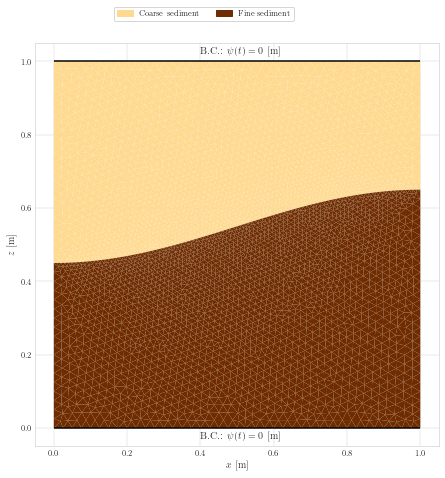

In [5]:
fig, ax = plt.subplots(figsize=(12,12/1.618))
ax.hlines(1,xmin=0, xmax=1)
ax.hlines(0,xmin=0, xmax=1)
ax.annotate('B.C.: $\psi(t)=0$ [m]', xy=(0.4,1.02))
ax.annotate('B.C.: $\psi(t)=0$ [m]', xy=(0.4,-0.03))
whetgeo2d_mesh.show_domain(ax, nodes, triangles, ID, layer_list=['Coarse sediment','Fine sediment'])
# fig.savefig('Kirkland_et_al_1992_TP1_setup.pdf', format='pdf', bbox_inches='tight')



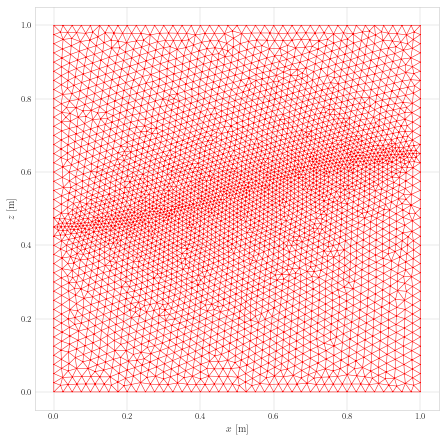

In [6]:
fig, ax = plt.subplots(figsize=(12,12/1.618))
whetgeo2d_mesh.show_unstructured_grid(ax, nodes, triangles)
# fig.savefig('Kirkland_et_al_1992_TP1_setup.pdf', format='pdf', bbox_inches='tight')


## Output

In [7]:
ds = xr.open_dataset(project_path+"/output/Manzini_Ferraris_2004_0000.nc")


### Water content

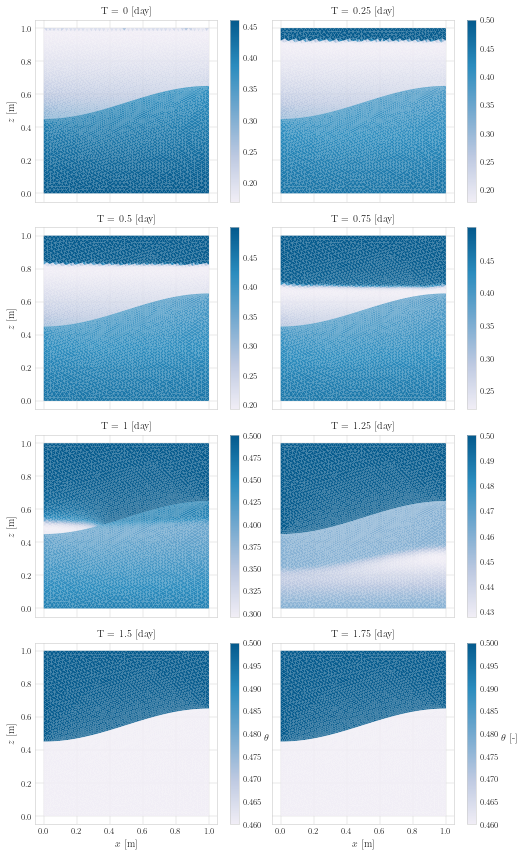

In [14]:

def showMeshPlot(nodes, elements, values):

    y = nodes[:,0]
    z = nodes[:,1]

    def quatplot(y,z, quatrangles, values, ax=None, **kwargs):

        if not ax: ax=plt.gca()
        yz = np.c_[y,z]
        verts= yz[quatrangles]
        pc = matplotlib.collections.PolyCollection(verts, **kwargs)
        pc.set_array(values)
        ax.add_collection(pc)
        ax.autoscale()
        return pc

    fig, ax = plt.subplots(figsize=(12/1.618,12))
#     fig.suptitle("Water content", fontsize=titleSize)
    ax1 = plt.subplot(421)
    ax1.set_aspect('equal')
    cmap = my_cmap# plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=0.034, vmax=0.5))
    pc = quatplot(y,z, np.asarray(elements), ds.theta.values[0,:], ax=ax1, 
             edgecolor="", cmap=cmap)
    cbar = fig.colorbar(pc, ax=ax1)    
    plt.title( 'T = 0 [day]', fontsize=titleSize)
    #plt.xlabel('$x$ [m]', fontsize=labelSize)
    plt.ylabel('$z$ [m]', fontsize=labelSize)
    plt.tick_params(axis='both', which='major', labelsize=axisTicksSize)
#     cbar.set_label('[-]', rotation=0, fontsize=labelSize,labelpad=20)
    plt.setp(ax1.get_xticklabels(), visible=False)

    ax2 = plt.subplot(422)
    ax2.set_aspect('equal')
    pc = quatplot(y,z, np.asarray(elements), ds.theta.values[6,:], ax=ax2, 
             edgecolor="", cmap=cmap)
    cbar = fig.colorbar(pc, ax=ax2)    
    plt.title('T = 0.25 [day]', fontsize=titleSize)
    #plt.xlabel('$x$ [m]', fontsize=labelSize)
    #plt.ylabel('$z$ [m]', fontsize=labelSize)
    plt.tick_params(axis='both', which='major', labelsize=axisTicksSize)
#     cbar.set_label('[-]', rotation=0, fontsize=labelSize,labelpad=20)
    plt.setp(ax2.get_xticklabels(), visible=False)
    plt.setp(ax2.get_yticklabels(), visible=False)

    ax3 = plt.subplot(423)
    ax3.set_aspect('equal')
    pc = quatplot(y,z, np.asarray(elements), ds.theta.values[12,:], ax=ax3, 
             edgecolor="", cmap=cmap)
    cbar = fig.colorbar(pc, ax=ax3)    
    plt.title( 'T = 0.5 [day]', fontsize=titleSize)
#     plt.xlabel('$x$ [m]', fontsize=labelSize)
    plt.ylabel('$z$ [m]', fontsize=labelSize)
    plt.tick_params(axis='both', which='major', labelsize=axisTicksSize)
    plt.setp(ax3.get_xticklabels(), visible=False)
#     cbar.set_label('[-]', rotation=0, fontsize=labelSize,labelpad=20)
    
    ax4 = plt.subplot(424)
    ax4.set_aspect('equal')
    pc = quatplot(y,z, np.asarray(elements), ds.theta.values[18,:], ax=ax4, 
             edgecolor="", cmap=cmap)
    cbar = fig.colorbar(pc, ax=ax4)    
    plt.title(  'T = 0.75 [day]', fontsize=titleSize)
#     plt.xlabel('$x$ [m]', fontsize=labelSize)
    #plt.ylabel('$z$ [m]', fontsize=labelSize)
    plt.tick_params(axis='both', which='major', labelsize=axisTicksSize)
#     cbar.set_label('[-]', rotation=0, fontsize=labelSize,labelpad=20)
    plt.setp(ax4.get_yticklabels(), visible=False)
    plt.setp(ax4.get_xticklabels(), visible=False)
    
    ax5 = plt.subplot(425)
    ax5.set_aspect('equal')
    pc = quatplot(y,z, np.asarray(elements), ds.theta.values[24,:], ax=ax5, 
             edgecolor="", cmap=cmap)
    cbar = fig.colorbar(pc, ax=ax5)    
    plt.title(  'T = 1 [day]', fontsize=titleSize)
#     plt.xlabel('$x$ [m]', fontsize=labelSize)
    plt.ylabel('$z$ [m]', fontsize=labelSize)
    plt.tick_params(axis='both', which='major', labelsize=axisTicksSize)
    plt.setp(ax5.get_xticklabels(), visible=False)
#     cbar.set_label('[-]', rotation=0, fontsize=labelSize,labelpad=20)
    
    ax6 = plt.subplot(426)
    ax6.set_aspect('equal')
    pc = quatplot(y,z, np.asarray(elements), ds.theta.values[30,:], ax=ax6, 
             edgecolor="", cmap=cmap)
    cbar = fig.colorbar(pc, ax=ax6)    
    plt.title(  'T = 1.25 [day]', fontsize=titleSize)
#     plt.xlabel('$x$ [m]', fontsize=labelSize)
    #plt.ylabel('$z$ [m]', fontsize=labelSize)
    plt.tick_params(axis='both', which='major', labelsize=axisTicksSize)
#     cbar.set_label('[-]', rotation=0, fontsize=labelSize,labelpad=20)
    plt.setp(ax6.get_yticklabels(), visible=False)
    plt.setp(ax6.get_xticklabels(), visible=False)

    ax7 = plt.subplot(427)
    ax7.set_aspect('equal')
    pc = quatplot(y,z, np.asarray(elements), ds.theta.values[36,:], ax=ax7, 
             edgecolor="", cmap=cmap)
    cbar = fig.colorbar(pc, ax=ax7)    
    plt.title(  'T = 1.5 [day]', fontsize=titleSize)
    plt.xlabel('$x$ [m]', fontsize=labelSize)
    plt.ylabel('$z$ [m]', fontsize=labelSize)
    plt.tick_params(axis='both', which='major', labelsize=axisTicksSize)
    cbar.set_label('$\\theta$ [-]', rotation=0, fontsize=labelSize,labelpad=10)

#     cbar.set_label('[-]', rotation=0, fontsize=labelSize,labelpad=20)
    
    ax8 = plt.subplot(428)
    ax8.set_aspect('equal')
    pc = quatplot(y,z, np.asarray(elements), ds.theta.values[42,:], ax=ax8, 
             edgecolor="", cmap=cmap)
    cbar = fig.colorbar(pc, ax=ax8)    
    plt.title(  'T = 1.75 [day]', fontsize=titleSize)
    plt.xlabel('$x$ [m]', fontsize=labelSize)
    #plt.ylabel('$z$ [m]', fontsize=labelSize)
    plt.tick_params(axis='both', which='major', labelsize=axisTicksSize)
#     cbar.set_label('[-]', rotation=0, fontsize=labelSize,labelpad=20)
    plt.setp(ax8.get_yticklabels(), visible=False)

    plt.subplots_adjust( wspace=-0.5, hspace=0.2)
    fig.subplots_adjust(right=0.8)
#     cbar_ax = fig.add_axes([0.9, 0.1, 0.017, 0.81])
#     sm = plt.cm.ScalarMappable(cmap=my_cmap, norm=plt.Normalize(vmin=0.034, vmax=0.5))
#     cbar = fig.colorbar(sm, cax=cbar)
    cbar.set_label('$\\theta$ [-]', rotation=0, fontsize=labelSize,labelpad=10)
    
    fig.tight_layout()
    plt.show()
#     fig.savefig('Manzini_water_content.pdf', dpi=300, bbox_inches='tight')

titleSize = 10
labelSize = 10
axisTicksSize = 8

showMeshPlot(nodes, triangles, ds.psi.values[1,:])